<font color=blue size=4><u><b>Problem statement:</b></u></font>

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

<font color=blue size=4><u><b>Objective:</b></u></font>
    
To create a multiclass classification model using a custom convolutional neural network in tensorflow

<font color=blue size=4><u><b>About Source Dataset</b></u></font>

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following category of diseases:
<ol>
    <li>Actinic keratosis</li>
    <li>Basal cell carcinoma</li>
    <li>Dermatofibroma</li>
    <li>Melanoma</li>
    <li>Nevus</li>
    <li>Pigmented benign keratosis</li>
    <li>Seborrheic keratosis</li>
    <li>Squamous cell carcinoma</li>
    <li>Vascular lesion</li>
</ol>

<p>
<H2><a href=https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing>Source Dataset is available here</a>
<hr>

<font color=blue size=4><u><b>Importing Skin Cancer Data

### Importing all the important libraries

In [57]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

This assignment uses a dataset of about 2339 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"CNN_assignment\SkinCancerISICData\Train")
data_dir_test = pathlib.Path(r"CNN_assignment\SkinCancerISICData\Test")

In [16]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [17]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [18]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [19]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [20]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

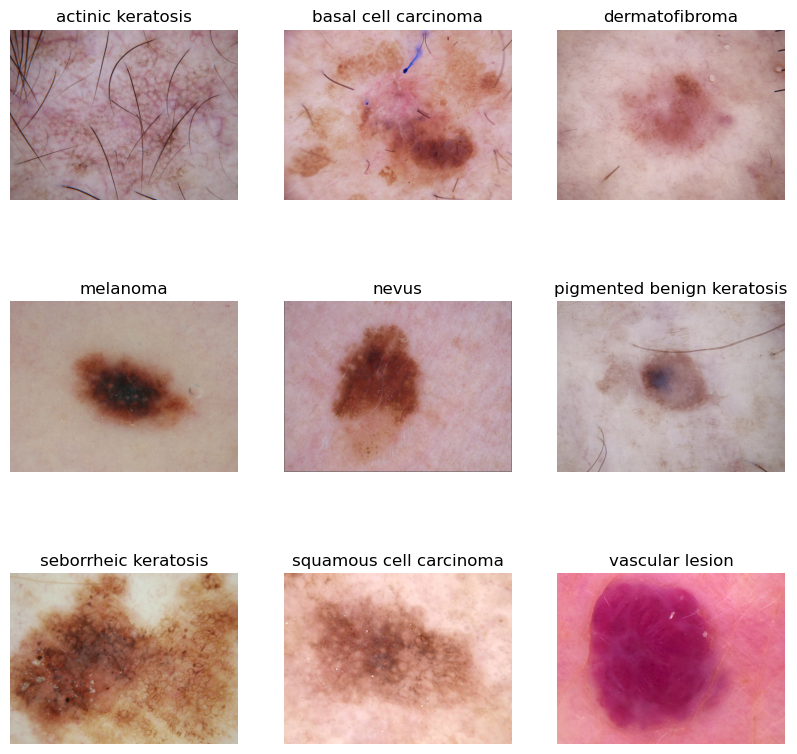

In [21]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(
      str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [41]:
### Your code goes here
#The Keras sequence class helps create a layer cluster that is linearly stacked into a tf. keras. Model.
num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),    
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [43]:
### Todo, choose an appropirate optimiser and loss function
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
# View the summary of all layers
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [45]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 292ms/step - accuracy: 0.1495 - loss: 13.2467 - val_accuracy: 0.1790 - val_loss: 13.2334 - learning_rate: 0.0010
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 263ms/step - accuracy: 0.1866 - loss: 11.9877 - val_accuracy: 0.2058 - val_loss: 10.6092 - learning_rate: 0.0010
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.2041 - loss: 11.1173 - val_accuracy: 0.2058 - val_loss: 10.6092 - learning_rate: 0.0010
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.2028 - loss: 10.8865 - val_accuracy: 0.2058 - val_loss: 10.6092 - learning_rate: 0.0010
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 267ms/step - accuracy: 0.1956 - loss: 11.1992 - val_accuracy: 0.2058 - val_loss: 10.6092 - learning_rate: 0.0010
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.1995 - loss: 11.0895 - val_accuracy: 0.2058 - val_loss: 10.6092 - learning_rate: 0.0010
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.1994

### Visualizing training results

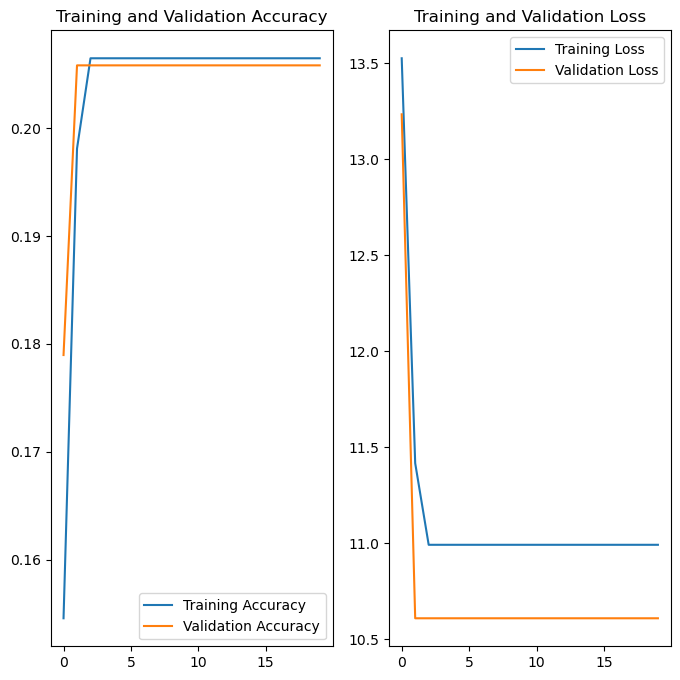

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

<font color = blue size=4> <b>My Findings are as follows</b>:

<font color = blue size=4> 
<li>The Traing accuracy and validation accuracy are almost same, but Acuracy is very low, which indicates that the model is underfitting.</li>
<li>Training loss and Validation Loss are low. Hence, we can collect that the model is not good.</li>

In [62]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(height_factor=(0.2,0.3), width_factor=(0.2,0.3))  
])

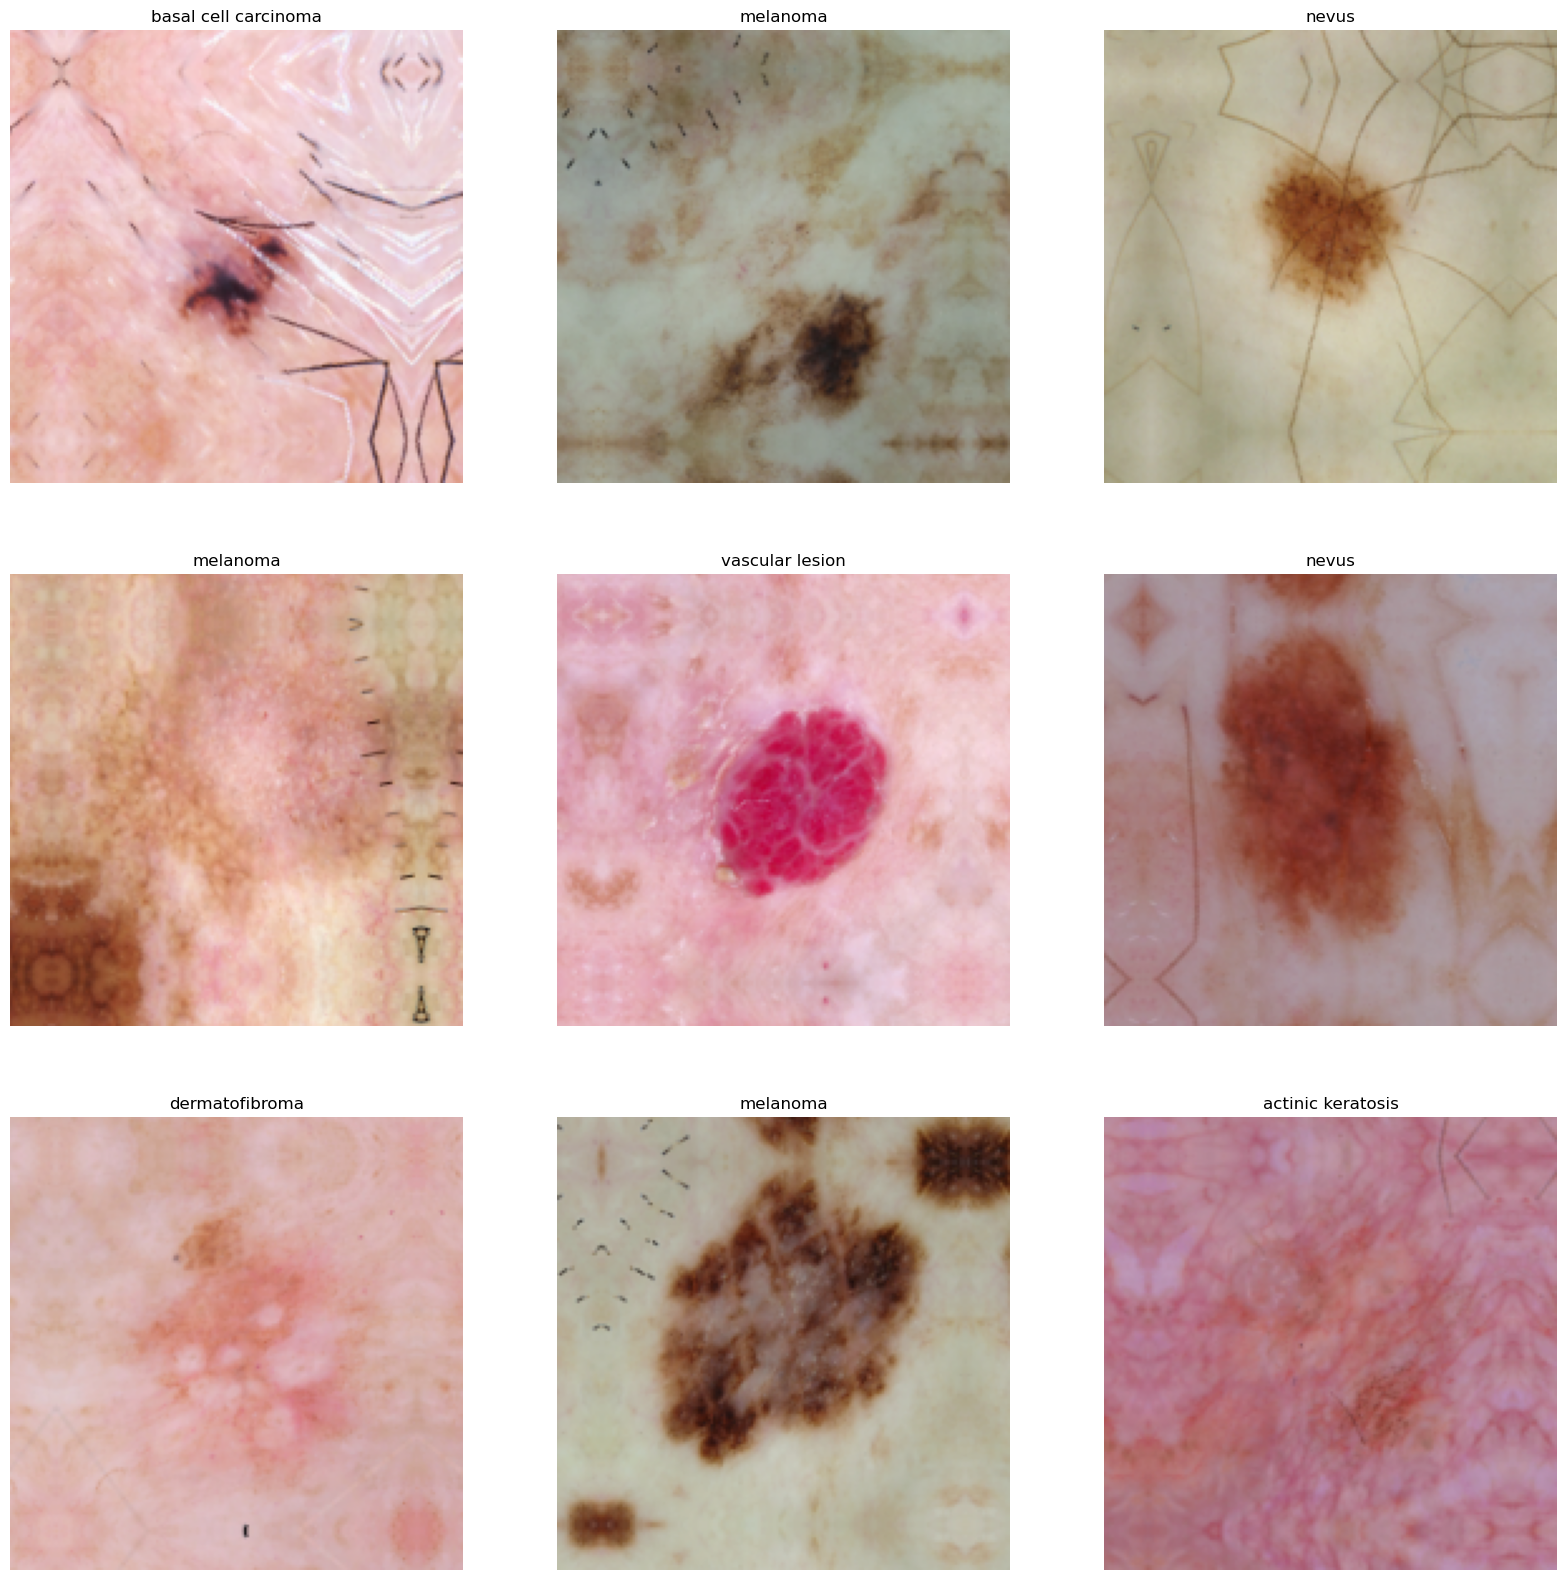

In [64]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(20, 20))
for img, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augmentation(img)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [79]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

### Compiling the model

In [81]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

### Training the model

In [83]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 390ms/step - accuracy: 0.1918 - loss: 2.3339 - val_accuracy: 0.3043 - val_loss: 1.9342 - learning_rate: 0.0010
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - accuracy: 0.3165 - loss: 1.8739 - val_accuracy: 0.4541 - val_loss: 1.6406 - learning_rate: 0.0010
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.4302 - loss: 1.6633 - val_accuracy: 0.4653 - val_loss: 1.5665 - learning_rate: 0.0010
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.4811 - loss: 1.5053 - val_accuracy: 0.4989 - val_loss: 1.4793 - learning_rate: 0.0010
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - accuracy: 0.4911 - loss: 1.4547 - val_accuracy: 0.5213 - val_loss: 1.4284 - learning_rate: 0.0010
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.5170 - loss: 1.4034 - val_accuracy: 0.5011 - val_loss: 1.4308 - learning_rate: 0.0010
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - accuracy: 0.4860 - loss: 1.

### Visualizing the results

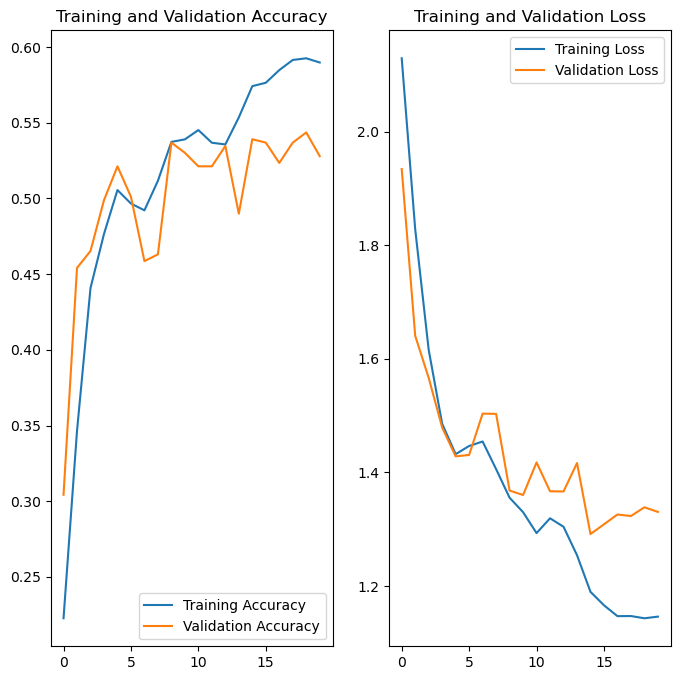

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

<font color = blue size=4> <b>My Findings are as follows</b>:

<font color = blue size=4> 
<li> The accuracy of the model has greatly increased along with the synchronization of the verification accuracy. </li>
<li> The loss function is synchronously exhausted for the training and validation data.</li>

<p></p>
This seems good fit, however accuracy is still low. 

Need to increase the epochs to train this model with class imbalance handled.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [87]:
## Your code goes here.

path_list=[]
lesion_list=[]

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,CNN_assignment\SkinCancerISICData\Train\actini...,actinic keratosis
1,CNN_assignment\SkinCancerISICData\Train\actini...,actinic keratosis
2,CNN_assignment\SkinCancerISICData\Train\actini...,actinic keratosis
3,CNN_assignment\SkinCancerISICData\Train\actini...,actinic keratosis
4,CNN_assignment\SkinCancerISICData\Train\actini...,actinic keratosis
...,...,...
2234,CNN_assignment\SkinCancerISICData\Train\vascul...,vascular lesion
2235,CNN_assignment\SkinCancerISICData\Train\vascul...,vascular lesion
2236,CNN_assignment\SkinCancerISICData\Train\vascul...,vascular lesion
2237,CNN_assignment\SkinCancerISICData\Train\vascul...,vascular lesion


<BarContainer object of 9 artists>

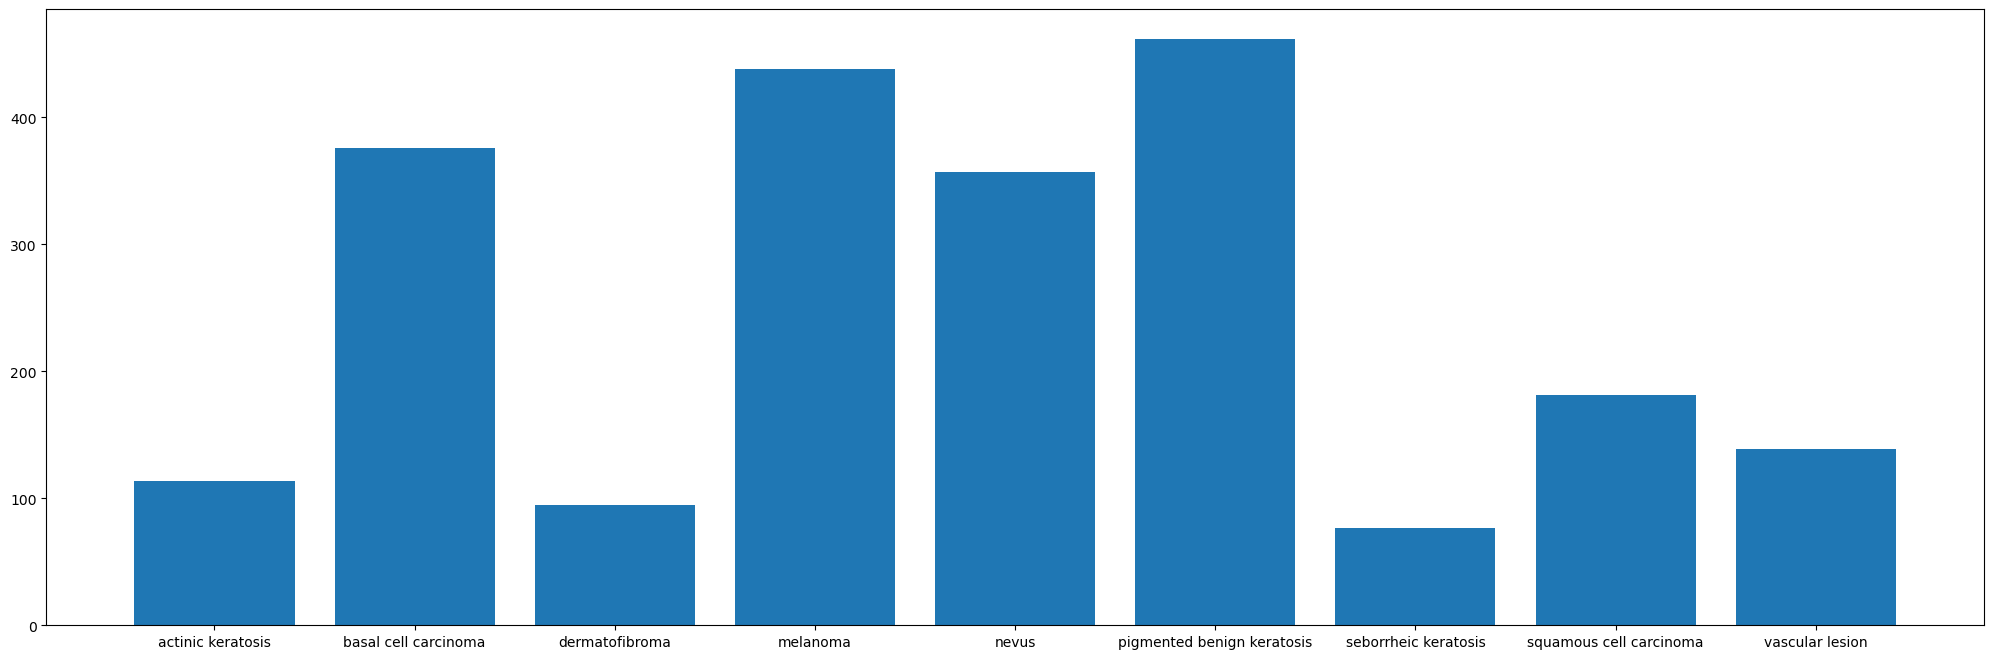

In [99]:
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,8))
plt.bar(class_names,class_count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?evus>evus

<font color=blue size=4> My Findings / observations are as follow:

<font color=red size=4>Which class has the least number of samples?</font><p>
<font color=blue size=4> The least number of samples are in seborrheic keratosis</font><p>
<font color=red size=4>Which classes dominate the data in terms proportionate number of samples?</font><p>
<font color=blue size=4>Out of 9 classes, there are 4 which are dominating in terms of number of samples proportionately. Those 4 are as follows:<p>
<ol>
    <li>Pigmented Benign
    <li>Melanoma
    <li>Basal Cell Carcinoma
    <li>Nevus

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [101]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [109]:
path_to_training_dataset=("CNN_assignment/SkinCancerISICData/Train/")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x173CDA32F30>: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 110.39 Samples/s]


Initialised with 376 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x173C3953650>: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 108.40 Samples/s]


Initialised with 95 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x173CA9E33B0>: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 102.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=722x545 at 0x173CDA4C3B0>: 100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.78 Samples/s]


Initialised with 357 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x17369792030>: 100%|██████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.81 Samples/s]


Initialised with 462 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17369792090>: 100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 67.90 Samples/s]


Initialised with 77 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x173C9AB02F0>: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [00:19<00:00, 25.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x173C8BCFA40>: 100%|██████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 49.82 Samples/s]


Initialised with 139 image(s) found.
Output directory set to CNN_assignment/SkinCancerISICData/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x173CD9EDA60>: 100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 46.14 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [110]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [111]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['CNN_assignment\\SkinCancerISICData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_32434de7-1020-45bd-bccd-76c22c01a6f6.jpg',
 'CNN_assignment\\SkinCancerISICData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_676d24e4-878a-423a-9bb6-cce295352fb7.jpg',
 'CNN_assignment\\SkinCancerISICData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_82690d09-8e21-4dbe-b710-04ea636c8264.jpg',
 'CNN_assignment\\SkinCancerISICData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9cf9e3a7-3ef5-466c-bd70-d03b587f3b6e.jpg',
 'CNN_assignment\\SkinCancerISICData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_fe125bdf-49d8-4ac8-b517-e5ae1ef10bc5.jpg',
 'CNN_assignment\\SkinCancerISICData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_1fcc3db3-e71b-4c96-8e8f-2f54097c96f7.jpg',
 'CNN_assignment\\SkinCancerISICData\\Train\\a

In [112]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [114]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [122]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [123]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [124]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [126]:
data_dir_train="CNN_assignment/SkinCancerISICData/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [127]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [128]:
## your code goes here

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [130]:
## your code goes here


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#### **Todo:**  Train your model

In [131]:
epochs = 30
## Your code goes here, use 50 epochs.
history30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 71s 387ms/step - accuracy: 0.2032 - loss: 2.0906 - val_accuracy: 0.4180 - val_loss: 1.5432
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 68s 399ms/step - accuracy: 0.3946 - loss: 1.5729 - val_accuracy: 0.4217 - val_loss: 1.5097
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 578ms/step - accuracy: 0.4394 - loss: 1.4654 - val_accuracy: 0.4796 - val_loss: 1.3890
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 69s 405ms/step - accuracy: 0.4658 - loss: 1.3818 - val_accuracy: 0.4803 - val_loss: 1.3226
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 100s 594ms/step - accuracy: 0.4809 - loss: 1.3720 - val_accuracy: 0.4929 - val_loss: 1.3114
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 95s 562ms/step - accuracy: 0.5051 - loss: 1.2839 - val_accuracy: 0.4848 - val_loss: 1.2639
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 457ms/step - accuracy: 0.5062 - loss: 1.2751 - val_accuracy: 0.4892 - val_loss: 1.2491
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 110s 648ms/step - accuracy: 0.5268 - loss:

#### **Todo:**  Visualize the model results

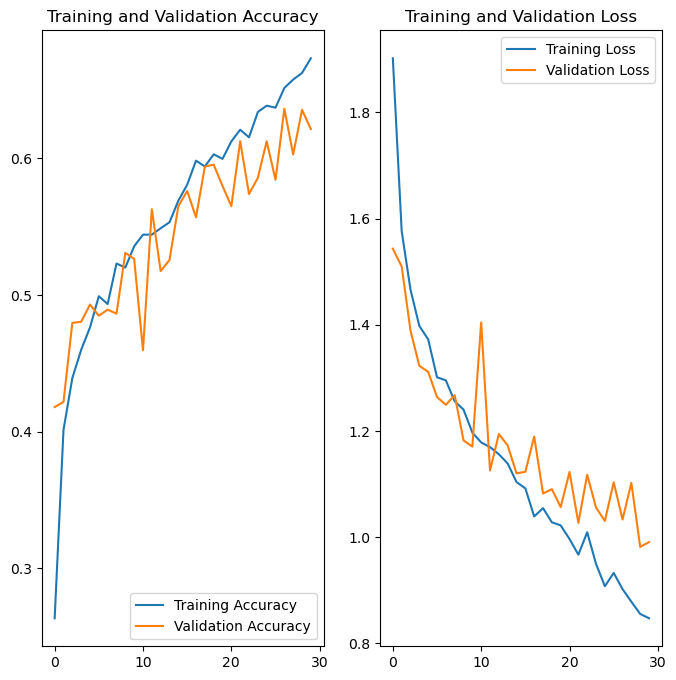

In [133]:
acc = history30.history['accuracy']
val_acc = history30.history['val_accuracy']

loss = history30.history['loss']
val_loss = history30.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



<font color = blue size=4>The problem of overfitting and underfitting was solved and the model was well trained for predictions. Data augmentation, outliers, and class equalization were found to be useful in improving model performance in this case.</font>

### Train Your Model with 50 epochs

In [134]:
epochs = 50
history50 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.6673 - loss: 0.8515 - val_accuracy: 0.6073 - val_loss: 1.0423
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 65s 384ms/step - accuracy: 0.6850 - loss: 0.8276 - val_accuracy: 0.6251 - val_loss: 1.0689
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 108s 638ms/step - accuracy: 0.6670 - loss: 0.8656 - val_accuracy: 0.6451 - val_loss: 0.9382
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 89s 529ms/step - accuracy: 0.6914 - loss: 0.7888 - val_accuracy: 0.6310 - val_loss: 1.0001
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 93s 544ms/step - accuracy: 0.6859 - loss: 0.8041 - val_accuracy: 0.6422 - val_loss: 0.9920
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 103s 608ms/step - accuracy: 0.6836 - loss: 0.8245 - val_accuracy: 0.6162 - val_loss: 1.0302
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 117s 691ms/step - accuracy: 0.6942 - loss: 0.7672 - val_accuracy: 0.6422 - val_loss: 0.9609
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 100s 593ms/step - accuracy: 0.7028 - los

#### **Todo:**  Visualize the model results

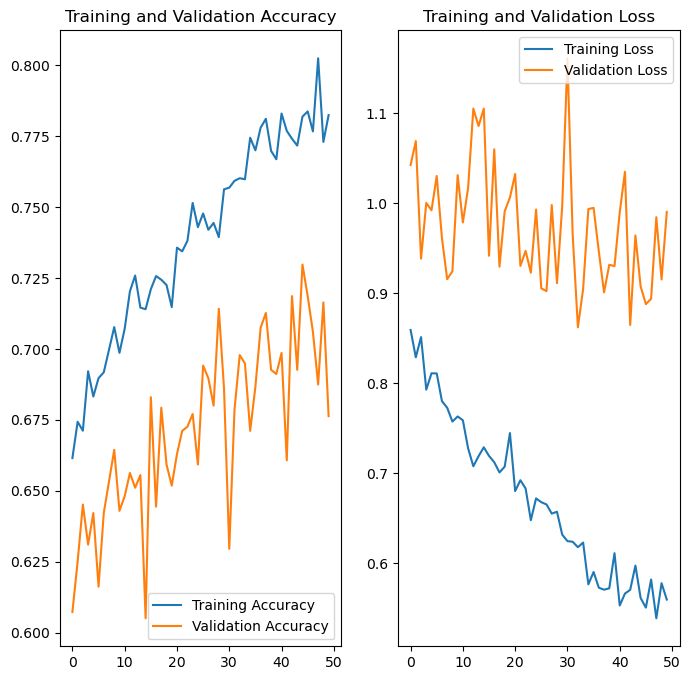

In [137]:
acc = history50.history['accuracy']
val_acc = history50.history['val_accuracy']

loss = history50.history['loss']
val_loss = history50.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<font color=blue size=4><u><b>Final Observations with 50 epoch:</b></u>

<font color=blue size=3> Training data accuracy has been improved with Augmentor library; But, the model seems still overfiting which can be resolved  by adding more layer, neurons or adding dropout layers.<p>